In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
# Load and overview the dataset
df = pd.read_csv('./data/hotel_revenue_edited.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,1,85,2018,July,27,1,0,3,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,0,No Deposit,240,0,Transient,82.0,0,1,Canceled
1,Resort Hotel,1,75,2018,July,27,1,0,3,2,0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,15,0,Transient,105.5,0,0,Canceled
2,Resort Hotel,1,23,2018,July,27,1,0,4,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,0,No Deposit,240,0,Transient,123.0,0,0,Canceled
3,Resort Hotel,1,60,2018,July,27,1,2,5,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,0,No Deposit,240,0,Transient,107.0,0,2,Canceled
4,Resort Hotel,1,96,2018,July,27,1,2,8,2,0,0,BB,PRT,Direct,Direct,0,0,0,0,No Deposit,No Agent,0,Transient,108.3,0,2,Canceled


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141497 entries, 0 to 141496
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           141497 non-null  object 
 1   is_canceled                     141497 non-null  int64  
 2   lead_time                       141497 non-null  int64  
 3   arrival_date_year               141497 non-null  int64  
 4   arrival_date_month              141497 non-null  object 
 5   arrival_date_week_number        141497 non-null  int64  
 6   arrival_date_day_of_month       141497 non-null  int64  
 7   stays_in_weekend_nights         141497 non-null  int64  
 8   stays_in_week_nights            141497 non-null  int64  
 9   adults                          141497 non-null  int64  
 10  children                        141497 non-null  int64  
 11  babies                          141497 non-null  int64  
 12  meal            

# EDA + Visualization

### How does the price of room per night vary over the year?

In [4]:
resort = df[(df['hotel']=='Resort Hotel') & (df['is_canceled']==0)]
city   = df[(df['hotel']=='City Hotel') & (df['is_canceled']==0)]

In [5]:
def data(df):
    data = df[df['is_canceled']==0].groupby('arrival_date_month')['adr'].mean().reset_index()
    return data

In [6]:
data2 = data(resort)
data2 = data2.merge(data(city),on='arrival_date_month')
data2.columns = ['month','price_for_resort','price_for_city']
data2

,month,price_for_resort,price_for_city
0,April,75.867816,112.051521
1,August,174.422077,111.954021
2,December,67.335920,85.721662
3,February,54.147478,86.610790
4,January,48.761125,82.630738
5,July,143.842203,112.322152
6,June,107.974850,117.890405
7,March,57.081521,90.681123
8,May,76.657558,120.671822
9,November,47.838034,82.966202


Resort Hotel's prices are much higher during the summer, whereas the prices of City Hotel doesn't get much higher in summer

### Distribution of nights spent at hotels by market segment and hotel type

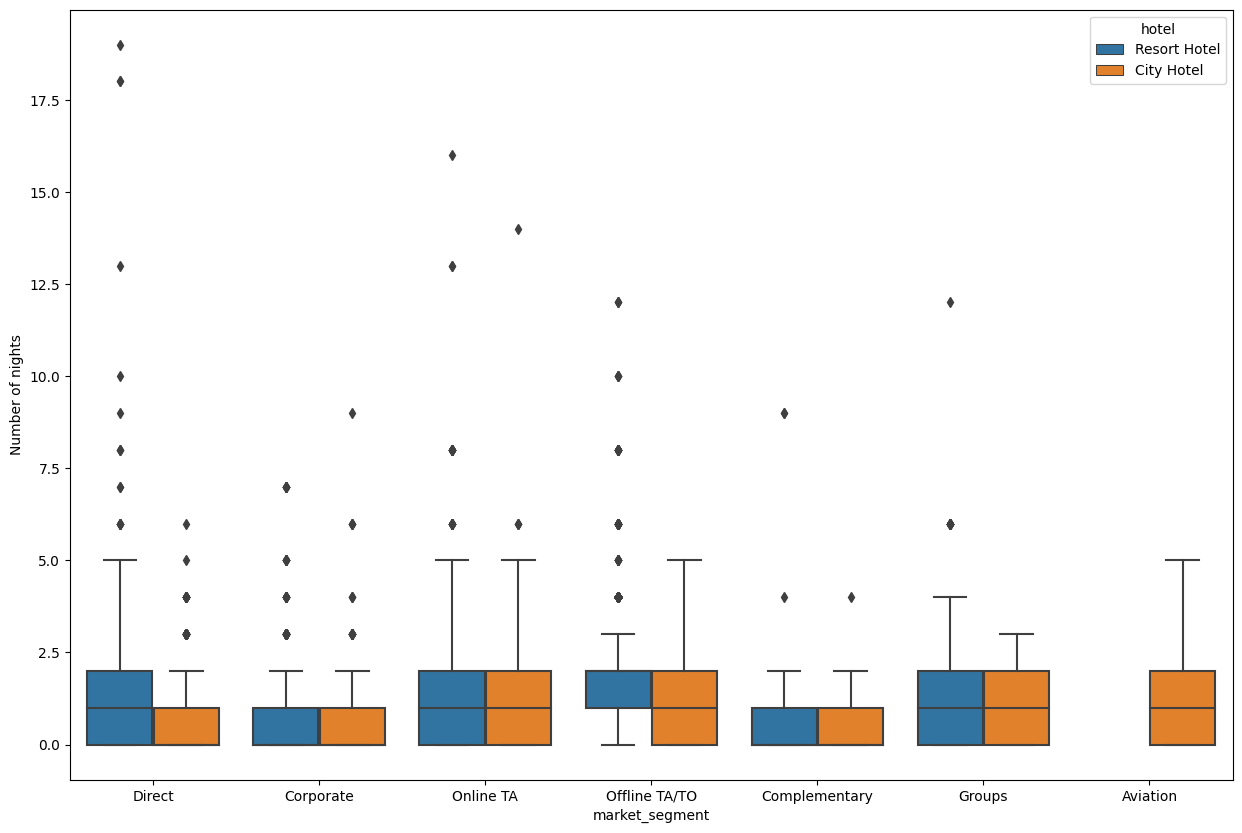

In [7]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df[df['is_canceled'] == 0],x='market_segment',y='stays_in_weekend_nights',hue='hotel')
plt.ylabel('Number of nights')
plt.show()

Most people don't seem to prefer to stay at the hotel more than one week

### Have any relationships between special requests and cancellation?

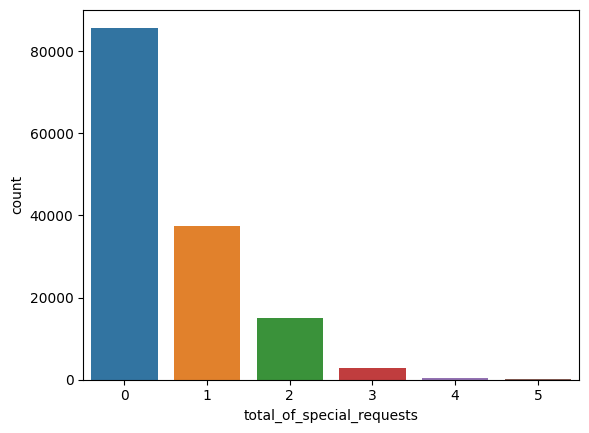

In [8]:
sns.countplot(x=df.total_of_special_requests);  

In [9]:
per = len(df[df['total_of_special_requests'] == 0]) * 100 / len(df)
per

60.642981830003464

It seems this was alomost 61% of the reservations don't have any special requests

### Which months guests are high?

In [10]:
df.arrival_date_year.unique()

array([2018, 2019, 2020], dtype=int64)

Text(0, 0.5, 'Number of guests')

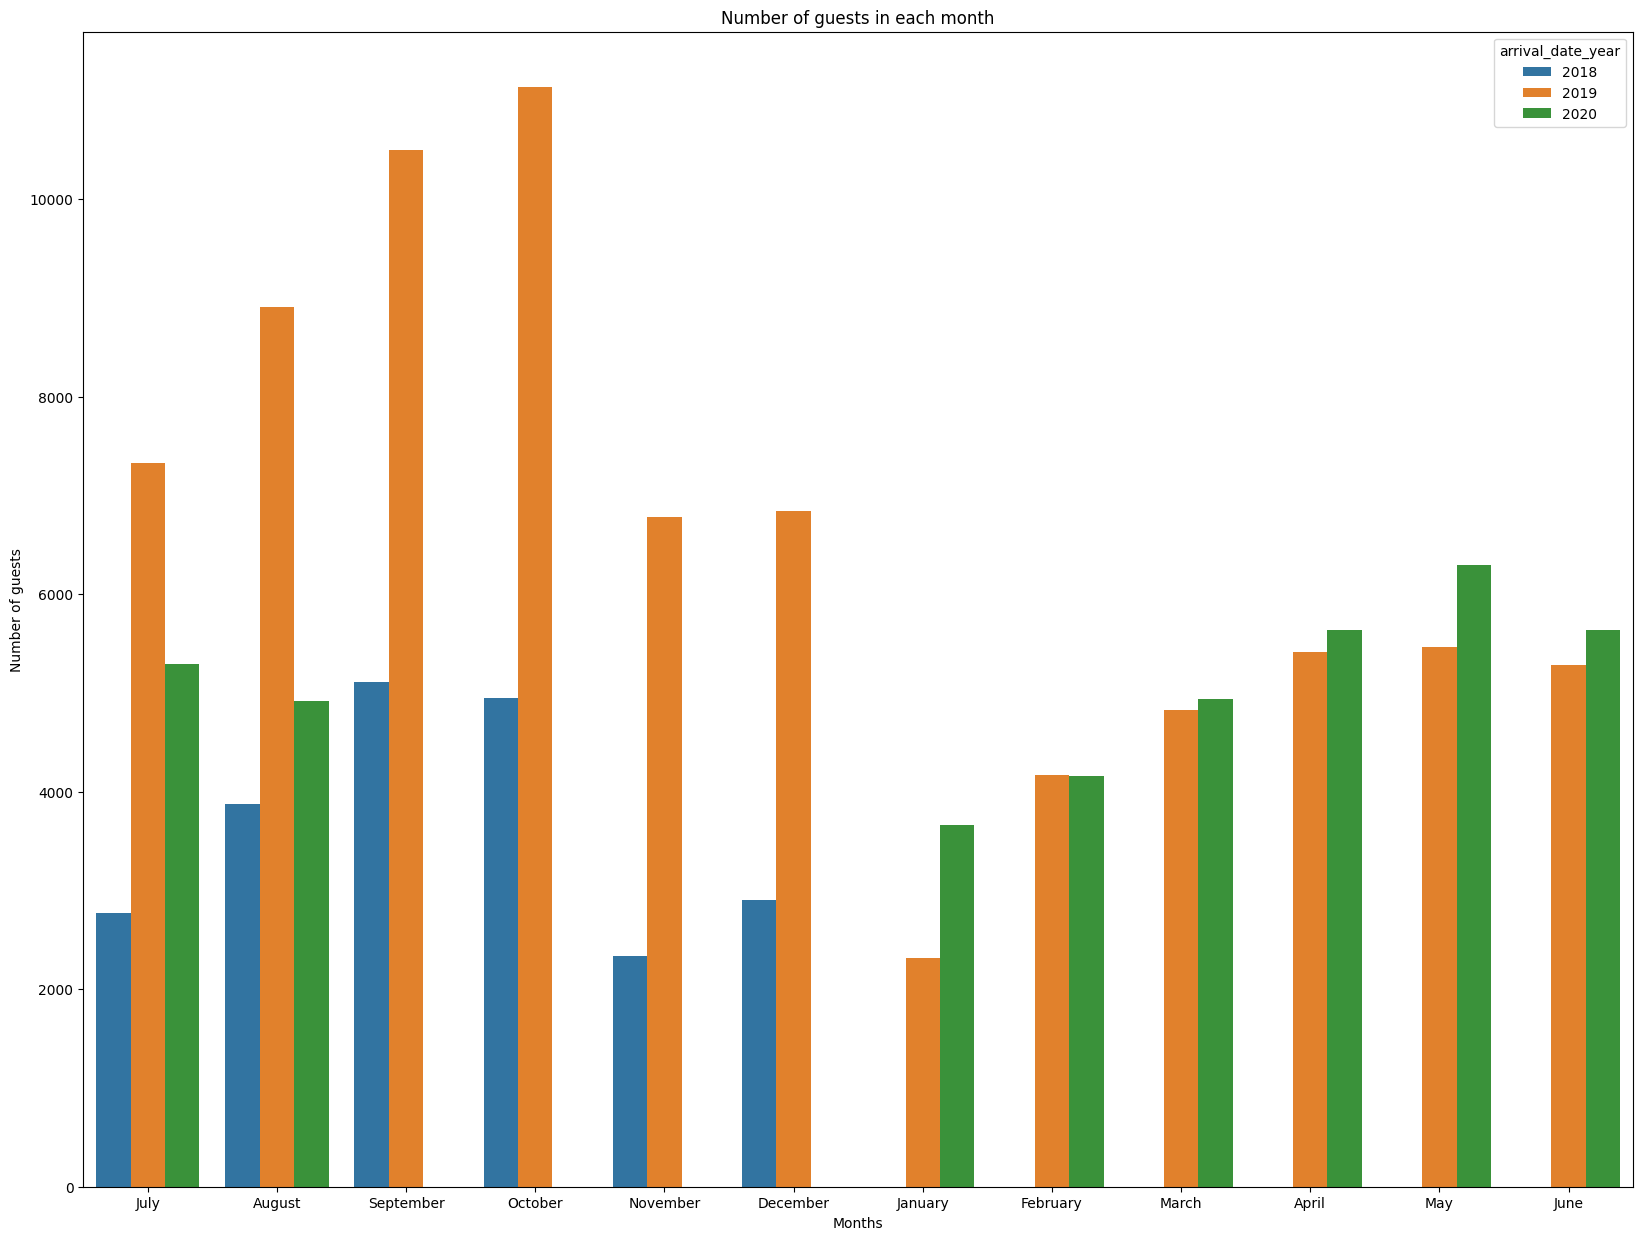

In [11]:
plt.figure(figsize=(20,15))
sns.countplot(data=df,x='arrival_date_month',hue='arrival_date_year')
plt.title('Number of guests in each month')
plt.xlabel('Months')
plt.ylabel('Number of guests')

In 2018 the most number of guests come at September
In 2019 the most number of guests come at October
In 2020 the most number of guests come at May

### Correlation between is_canceled and the rest of the data 

In [12]:
df.corr()['is_canceled'].sort_values()

C:\Users\biauser\AppData\Local\Temp\ipykernel_6348\229158874.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['is_canceled'].sort_values()


total_of_special_requests        -0.228328
required_car_parking_spaces      -0.196284
booking_changes                  -0.150388
is_repeated_guest                -0.061672
previous_bookings_not_canceled   -0.054829
babies                           -0.033060
arrival_date_day_of_month        -0.009078
arrival_date_week_number         -0.008168
stays_in_weekend_nights          -0.003901
children                         -0.002515
stays_in_week_nights              0.012849
arrival_date_year                 0.014249
adr                               0.030028
days_in_waiting_list              0.040971
adults                            0.060101
previous_cancellations            0.136642
lead_time                         0.316174
is_canceled                       1.000000
Name: is_canceled, dtype: float64

C:\Users\biauser\AppData\Local\Temp\ipykernel_6348\2207100383.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True);


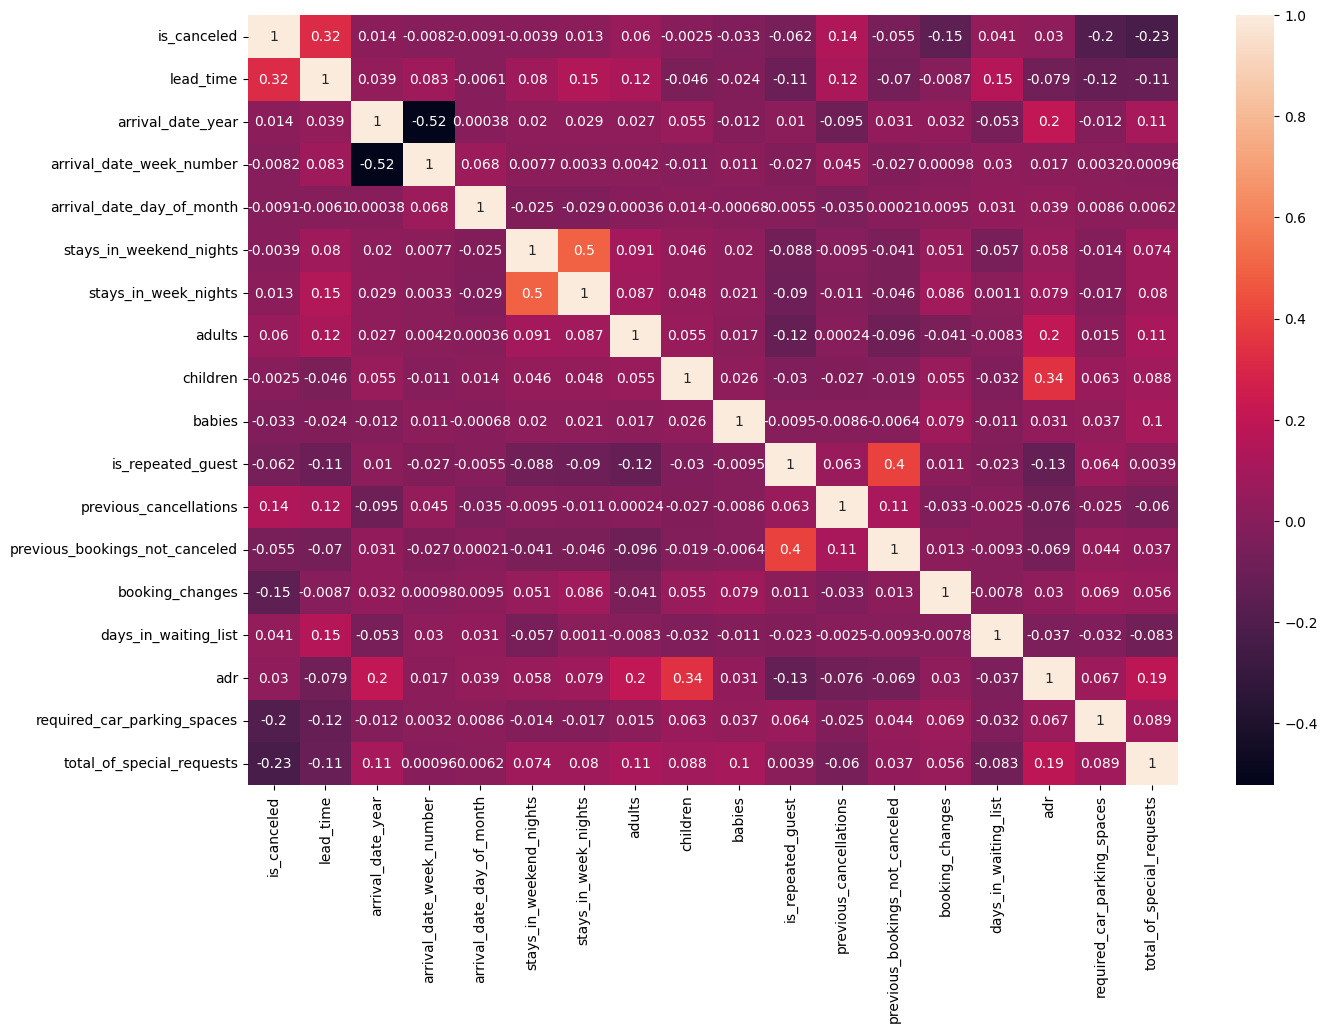

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True);